# 필요 요건

이하 예제 코드는 다음 패키지를 필요로 합니다.

- pandas
- matplotlib
- scikit-learn
- python-mecab-ko
- gensim


In [1]:
%pip install pandas matplotlib scikit-learn python-mecab-ko gensim

Note: you may need to restart the kernel to use updated packages.


# Token To Vector

토큰화된 텍스트 및 그 인덱스도 머신이 바로 이해할 수 있는 형태가 아닙니다.

우리는 텍스트를 어떤 공간 좌표 위에 할당하여 그 좌표 벡터가 토큰을 대표(represent)하는 방식을 사용합니다.

그 좌표의 위치관계와 거리(유사도)가 곧 단어의 의미와 관계를 함의할 것이라고 믿습니다. 

텍스트를 벡터화하는 방법은 여러가지 있습니다.
- N-gram
- Bag-of-words
- TF-IDF
- GloVE
- ... 등등 

단어를 벡터화하는 것을 워드 임베딩(Word Embedding)이라 합니다. 

해당 코드 예제에서는 토큰화된 텍스트로 워드 임베딩(Word Embedding)을 생성하는 방법을 시연합니다.

# 원-핫 임베딩 (One-hot Embedding)

가장 간단한 임베딩입니다. 사전 길이 만큼의 차원을 가지는 0벡터를 만들고, 단어의 인덱스 번호의 값만 1로 설정합니다.

값 하나만 1이기 때문에 One-hot, One-hot Vector 라고 부릅니다.

어떠한 언어적인 의미도 내포하지 않습니다. 행렬에서 특정 행 또는 열을 선별(look-up)할때 행렬곱에서 사용하는 기능적인 벡터로도 쓰입니다.

In [2]:
vocab = ["나", "엄마", "아빠", "사과", "바나나"]

word2index = {v: i for i, v in enumerate(vocab)}

def one_hot_encoding(index, maxlen):
    """차원이 """
    tmp = [0] * maxlen
    tmp[index] = 1
    return tmp
 

for v in vocab:
    print(f"'{v}'의 인덱스: {word2index[v]}")
    print(f"'{v}'의 원-핫 벡터: {one_hot_encoding(word2index[v], len(vocab))} ")

'나'의 인덱스: 0
'나'의 원-핫 벡터: [1, 0, 0, 0, 0] 
'엄마'의 인덱스: 1
'엄마'의 원-핫 벡터: [0, 1, 0, 0, 0] 
'아빠'의 인덱스: 2
'아빠'의 원-핫 벡터: [0, 0, 1, 0, 0] 
'사과'의 인덱스: 3
'사과'의 원-핫 벡터: [0, 0, 0, 1, 0] 
'바나나'의 인덱스: 4
'바나나'의 원-핫 벡터: [0, 0, 0, 0, 1] 


# TF-IDF

TF-IDF는 단어 빈도(Term Frequency)와 문서 빈도의 역수 (Inverse Document Frequency)를 활용하여 단어와 문서의 관계를 벡터화하는 통계적인 방법입니다.

단어가 한 문서에서 자주 등장하지만, 여러 문서에서 만연하게 등장하지 않는다면 중요한 단어일 가능성이 높다는 직관에서 시작합니다.

TF-IDF는 다양한 가중치 함수를 가지고 있으며 여기서는 다음과 같은 방식을 소개합니다.

단어집합 $T$와 문서집합 $D$에 대하여 
$$
f_{t,d} = \text{\{문서 d에서 단어 t의 등장 횟수\}}\\

n_t = \text{\{단어 t가 등장한 문서의 개수\}}\\

\text{tf}(t, d) = f_{t,d}\\

\text{idf}(t) = \log{\left(\frac{|D|}{n_t+1}\right)}\\

\text{tf-idf}(t,d) = \text{tf}(t,d) \cdot \text{idf}(t)
$$

In [3]:
import pandas as pd
from math import log

docs = [
    "나 는 엄마 가 좋다",
    "나 는 아빠 가 좋다",
    "사과 는 과일 입니다",
    "사과 의 효능 사과 는 건강 에 좋다",
    "바나나 가 과일 입니다",
]
# 사용한 모든 단어
vocab = list(set([w for doc in docs for w in doc.split()]))
vocab.sort()

vocab

['가',
 '건강',
 '과일',
 '나',
 '는',
 '바나나',
 '사과',
 '아빠',
 '엄마',
 '에',
 '의',
 '입니다',
 '좋다',
 '효능']

In [4]:
#문서의 개수
N = len(docs)


def tf(t, d):
    return d.split().count(t)

def idf(t):
    df = 0
    for doc in docs:
        if t in doc:
            df += 1
    return log(N/(df+1))

def tfidf(t, d):
    return tf(t,d)*idf(t)

In [5]:
# 단어와 문서에 대한 TF 매트릭스
tf_matrix = []

for d in docs:
    tmp = []
    for t in vocab:
        tmp.append(tf(t,d))
    tf_matrix.append(tmp)


pd.DataFrame(tf_matrix, index=[f"docs #{i}" for i in range(N)], columns=vocab)

,가,건강,과일,나,는,바나나,사과,아빠,엄마,에,의,입니다,좋다,효능
docs #0,1,0,0,1,1,0,0,0,1,0,0,0,1,0
docs #1,1,0,0,1,1,0,0,1,0,0,0,0,1,0
docs #2,0,0,1,0,1,0,1,0,0,0,0,1,0,0
docs #3,0,1,0,0,1,0,2,0,0,1,1,0,1,1
docs #4,1,0,1,0,0,1,0,0,0,0,0,1,0,0


In [6]:
# 단어에 대한 IDF
idf_list = []

for t in vocab:
    idf_list.append(idf(t))


pd.DataFrame(idf_list, index=vocab, columns=["IDF"])

,IDF
가,0.223144
건강,0.916291
과일,0.510826
나,0.223144
는,0.000000
바나나,0.916291
사과,0.510826
아빠,0.916291
엄마,0.916291
에,0.916291


In [7]:
# TF-IDF 매트릭스
tfidf_matrix = []

for d in docs:
    tmp = []
    for t in vocab:
        tmp.append(tfidf(t,d))
    tfidf_matrix.append(tmp)


pd.DataFrame(tfidf_matrix, index=[f"docs #{i}" for i in range(N)], columns=vocab)

,가,건강,과일,나,는,바나나,사과,아빠,엄마,에,의,입니다,좋다,효능
docs #0,0.223144,0.000000,0.000000,0.223144,0.0,0.000000,0.000000,0.000000,0.916291,0.000000,0.000000,0.000000,0.223144,0.000000
docs #1,0.223144,0.000000,0.000000,0.223144,0.0,0.000000,0.000000,0.916291,0.000000,0.000000,0.000000,0.000000,0.223144,0.000000
docs #2,0.000000,0.000000,0.510826,0.000000,0.0,0.000000,0.510826,0.000000,0.000000,0.000000,0.000000,0.510826,0.000000,0.000000
docs #3,0.000000,0.916291,0.000000,0.000000,0.0,0.000000,1.021651,0.000000,0.000000,0.916291,0.916291,0.000000,0.223144,0.916291
docs #4,0.223144,0.000000,0.510826,0.000000,0.0,0.916291,0.000000,0.000000,0.000000,0.000000,0.000000,0.510826,0.000000,0.000000


위의 결과에서 다음을 알 수 있습니다.
- 만연하게 등장하는 단어일수록 IDF 값이 작아져 TF-IDF 값이 전체적으로 작아진다 (ex. "가", "는").
- 고유하게 등장하는 단어일수록 IDF 값이 커져 TF-IDF 값이 전체적으로 커진다 (ex. "건강", "바나나").
- 한 문서에서 반복해서 등장하는 단어라면 그 문서에서의 TF-IDF 값이 커진다 (ex. 문서 #3의 "사과").

우리는 한 단어에 대한 TF-IDF 가중치 리스트를 그 단어에 대한 벡터로 다룰 수 있습니다. 이 예제에서 예를 들어, "사과"의 벡터는
```
[0.0    0.0     0.5108  1.021   0.0]
```
라고 볼 수 있습니다.

-----

문서 집합에서 하나의 문서가 하나의 주제만을 다루면서 집합 전체는 다양한 분야를 다룰 때 TF-IDF는 효과적인 워드 임베딩 수단이 될 수 있습니다.

밀접한 관계를 가진 단어들은 특정 주제에서 함께 빈도가 높을 것이며, 그런 단어들의 벡터들은 서로 유사하게 (벡터 공간에서 가깝게) 형성될 것이기 때문입니다.

단점으로는, 문서의 구성에 따라 TF-IDF의 워드임베딩 품질이 달라지기에 적절하게 문서들을 선정/분할해야 한다는 번거로운 점이 있습니다.

또한 문서의 개수에 따라 벡터 차원의 크기가 달라지며, 자주 등장하지 않는 단어의 벡터는 대다수의 문서에서 0값을 가지게 되어 많은 단어와 문서를 다루기에 메모리 공간에 대해 비효율적이라는 단점이 있습니다.

# Word2vec

Word2Vec은 자연어 모델링 문제를 활용하여 단어의 벡터를 학습하는 일련의 방법을 말합니다. 대표적인 방법으로는 크게 두가지가 있습니다.

- CBOW
- Skip-Gram

두 과정 모두 토큰화를 위한 단어 사전 (vocabulary)과 학습에 필요한 말뭉치가 이미 있다고 전제합니다.

## CBOW (Continous Bag-of-Words)

CBOW는 이웃한 단어를 보고 중심 단어를 예측하는 문제를 해결합니다.

이웃한 단어를 입력, 중심단어를 출력(label)으로 하는 자연어 모델링 문제입니다.



최종적으로 최종적으로 단어의 벡터를 학습합니다.

학습 과정을 도식으로 나타내면 다음과 같습니다.

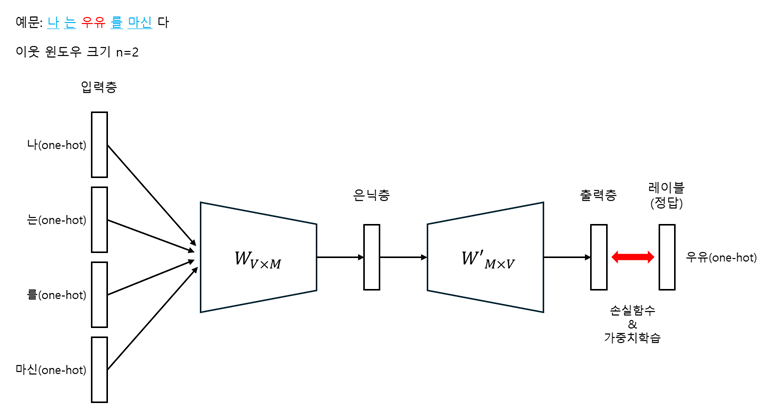

차원 $V$는 사전의 크기, 차원 $M$은 은닉층의 차원입니다.

은닉층과 출력층, 총 2층의 행렬곱(projection) 층으로 이루어져 있습니다.

먼저 은닉층부터 살펴봅시다. 각 입력 토큰(원핫 벡터)를 가중치 $W$에 곱합니다.

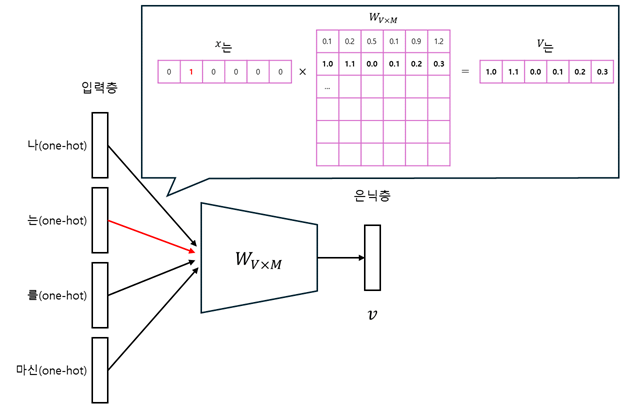

이때 단어 원핫 벡터와 가중치 행렬이 행렬곱한 결과 $V_i$는 행렬의 하나의 행입니다.

즉, $V_i$는 그 단어에 대한 벡터 표현 (잠재 표현)이라고 말할 수 있습니다.

여기서 학습시키는 가중치 $W$는 곧 단어 벡터의 집합으로 여길 수 있습니다.



우리는 중심 단어를 예측하기 위하여, 이웃한 모든 단어의 벡터표현의 평균을 구합니다.

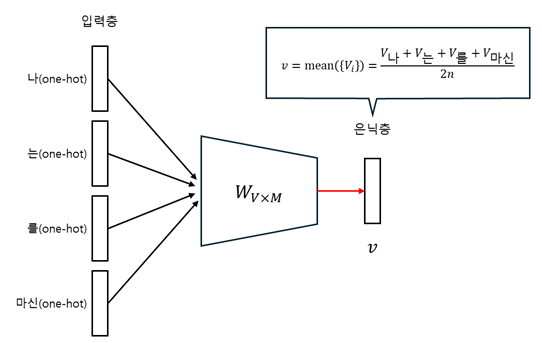


그 후 다음 출력층을 통과하고 softmax 활성화 함수를 적용합니다.

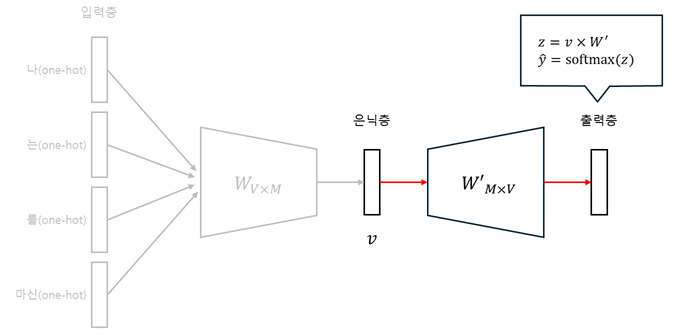

이 층의 출력 $\hat{y}$는 사전에 있는 각 단어에 대하여 중심 단어일 예측 확률 벡터입니다.

최종적으로 중심 단어의 원-핫 벡터와 Cross Entropy 손실함수를 적용하여 손실 값을 구한 뒤, 이를 역전파하여 학습을 진행합니다.

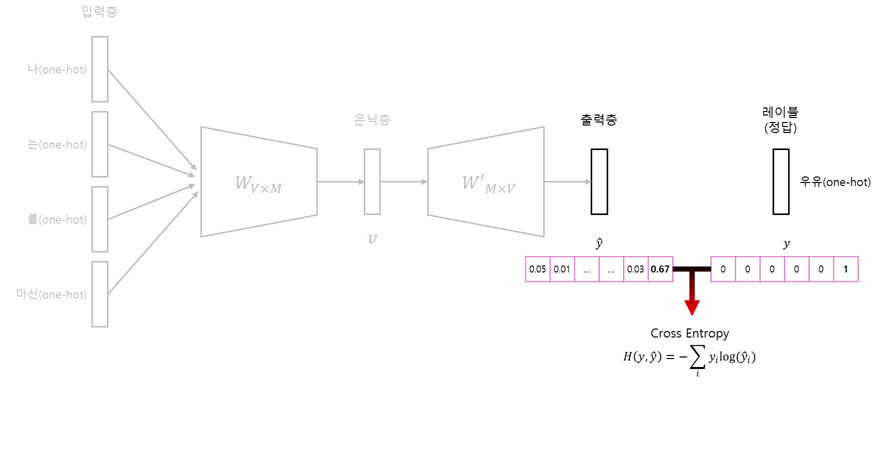

## Skip-gram

CBOW와 반대로 Skip-gram은 중심 단어를 보고 이웃한 단어들을 예측하는 문제를 다룹니다.

입력이 중심 단어이고 각 이웃 단어들에 대해서 손실함수를 구한다는 점을 제외하면 내부 원리는 똑같습니다.

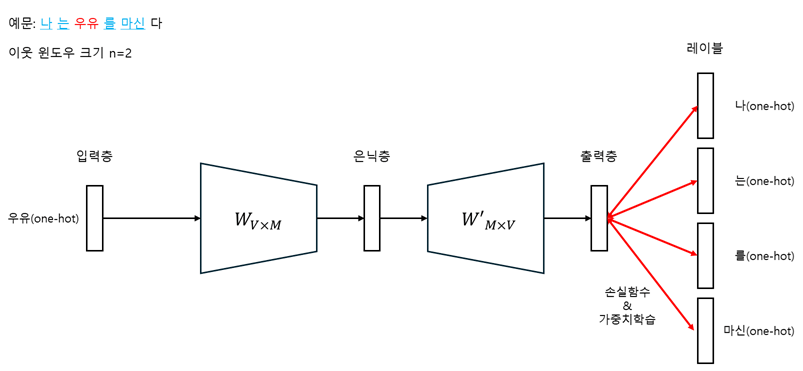

# 한국어 Word2Vec 만들기 실습

`gensim` 패키지는 Word2Vec을 쉽게 학습할 수 있는 모델을 제공합니다.

토큰으로 분할된 텍스트 말뭉치를 입력하면 사전 생성부터 임베딩 학습까지 하나의 호출로 이루어줍니다.

이 패키지와 한국어 영화 리뷰 데이터를 이용하여 한국어 Word2Vec 생성을 시연해봅시다.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from mecab import MeCab

In [9]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
train_data = pd.read_table('ratings.txt')

print("총 리뷰 개수:", len(train_data))

train_data.head(5)

총 리뷰 개수: 200000


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [10]:
# 결측값 (missing value) 확인
print("결측값 유무:", train_data.isnull().values.any())

# 결측값 제거
train_data = train_data.dropna(how="any") # null이 존재하는 행 제거

print("처리 후 결측값 유무:", train_data.isnull().values.any())

print("처리 후 리뷰 개수:", len(train_data))

결측값 유무: True
처리 후 결측값 유무: False
처리 후 리뷰 개수: 199992


In [11]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

mecab = MeCab()

# 토큰화
tokenized_data = []
for i, line in enumerate(train_data["document"]):
    tokenized_line = mecab.morphs(line)
    tokenized_line = [word for word in tokenized_line if word not in stopwords]
    tokenized_data.append(tokenized_line)
    if (i+1) % 1000 == 0:
        print(f"\r({i+1}/{len(train_data)})줄 처리 완료", end="")
print("\n전부 완료!")


(199000/199992)줄 처리 완료
전부 완료!


리뷰의 최대 길이 116
리뷰의 평균 길이 15.653461138445538


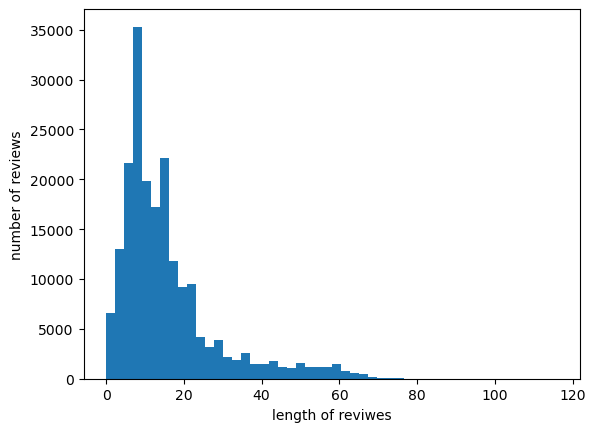

In [12]:
# 리뷰 길이 분포 그림
print("리뷰의 최대 길이", max([len(review) for review in tokenized_data]))
print("리뷰의 평균 길이", sum([len(review) for review in tokenized_data])/len(tokenized_data))

plt.hist([len(review) for review in tokenized_data], bins = 50)
plt.xlabel("length of reviews")
plt.ylabel("number of reviews")
plt.show()

In [13]:
# gensim 의 Word2Vec

model = Word2Vec(
    sentences=tokenized_data, # 학습 데이터
    vector_size=128, # 토큰 잠재벡터 크기
    window=5, # 중심단어에서 이웃단어를 선택하는 범위. 
    min_count=5, # 이 빈도보다 적게 나타나는 단어는 제외함
    workers=4, # 멀티쓰레딩 쓰레드 개수. 
    sg=0 # 0 = CBOW, 1=skip-gram
)

In [14]:
# 학습이 끝나면 model.wv 에 결과가 저장됩니다.
# 완성된 임베딩 매트릭스의 크기 확인
print(model.wv.vectors.shape)

# 생성된 사전 확인, 토큰 to 인덱스. dict 형 
for i, k in enumerate(model.wv.key_to_index):
    if i >= 10:
        break
    print(f"token: {k}  index: {model.wv.key_to_index[k]}")

print()
# 인덱스 to 토큰. 주의: 리스트형
for i in range(10):
    print(f"index: {i}  token: {model.wv.index_to_key[i]}")

(18955, 128)
token: .  index: 0
token: 영화  index: 1
token: 다  index: 2
token: 고  index: 3
token: 하  index: 4
token: 을  index: 5
token: 보  index: 6
token: ..  index: 7
token: 게  index: 8
token: ,  index: 9

index: 0  token: .
index: 1  token: 영화
index: 2  token: 다
index: 3  token: 고
index: 4  token: 하
index: 5  token: 을
index: 6  token: 보
index: 7  token: ..
index: 8  token: 게
index: 9  token: ,


In [15]:
# 유사한 (벡터를 가지는) 단어 찾기. 단어 - 유사도 쌍 리스트 반환
print("'영화'와 유사한 단어")
for token, sim in model.wv.most_similar("영화"): print(f" - {token}, 유사도: {sim}")

print("'남자'와 유사한 단어")
for token, sim in model.wv.most_similar("남자"): print(f" - {token}, 유사도: {sim}")

'영화'와 유사한 단어
 - 작품, 유사도: 0.5917276740074158
 - 애니메이션, 유사도: 0.5674808025360107
 - 드라마, 유사도: 0.5632325410842896
 - 다큐, 유사도: 0.5110109448432922
 - 애니, 유사도: 0.5091713070869446
 - 수작, 유사도: 0.5090677738189697
 - 독립영화, 유사도: 0.5066527724266052
 - 스릴러, 유사도: 0.49863776564598083
 - 만화, 유사도: 0.49124273657798767
 - 명작, 유사도: 0.48278558254241943
'남자'와 유사한 단어
 - 여자, 유사도: 0.8379809260368347
 - 주인공, 유사도: 0.6483213901519775
 - 남녀, 유사도: 0.6175082921981812
 - 남편, 유사도: 0.6018498539924622
 - 딸, 유사도: 0.5998973846435547
 - 친구, 유사도: 0.5821703672409058
 - 아내, 유사도: 0.5733000636100769
 - 아줌마, 유사도: 0.5493239164352417
 - 얼굴, 유사도: 0.5481908321380615
 - 행동, 유사도: 0.5404360890388489


`영화`와 유사한 단어로 `작품`, `드라마`, `애니메이션` 등이 반환됩니다.

이는 주로 문장에서 어떤 단어 대신에 치환되어도 일리가 있는 단어들이 유사한 벡터를 생성하도록 학습되기 때문입니다.


다음 코드로 Word2Vec을 저장하고 불러옵니다.

In [35]:
model.save('kor_w2v') # 모델 저장
loaded_model = Word2Vec.load("kor_w2v") # 모델 로드

numpy.ndarray

# Word2Vec 시각화

고차원의 임베딩 벡터는 우리의 눈으로 살펴보기에는 너무 복잡합니다.

차원감소기법인 T-SNE를 활용하여 2차원으로 감소시켜 단어간의 대략적인 위치관계를 시각화해볼 수 있습니다.

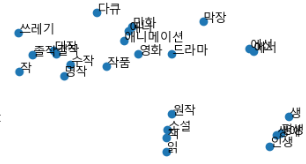

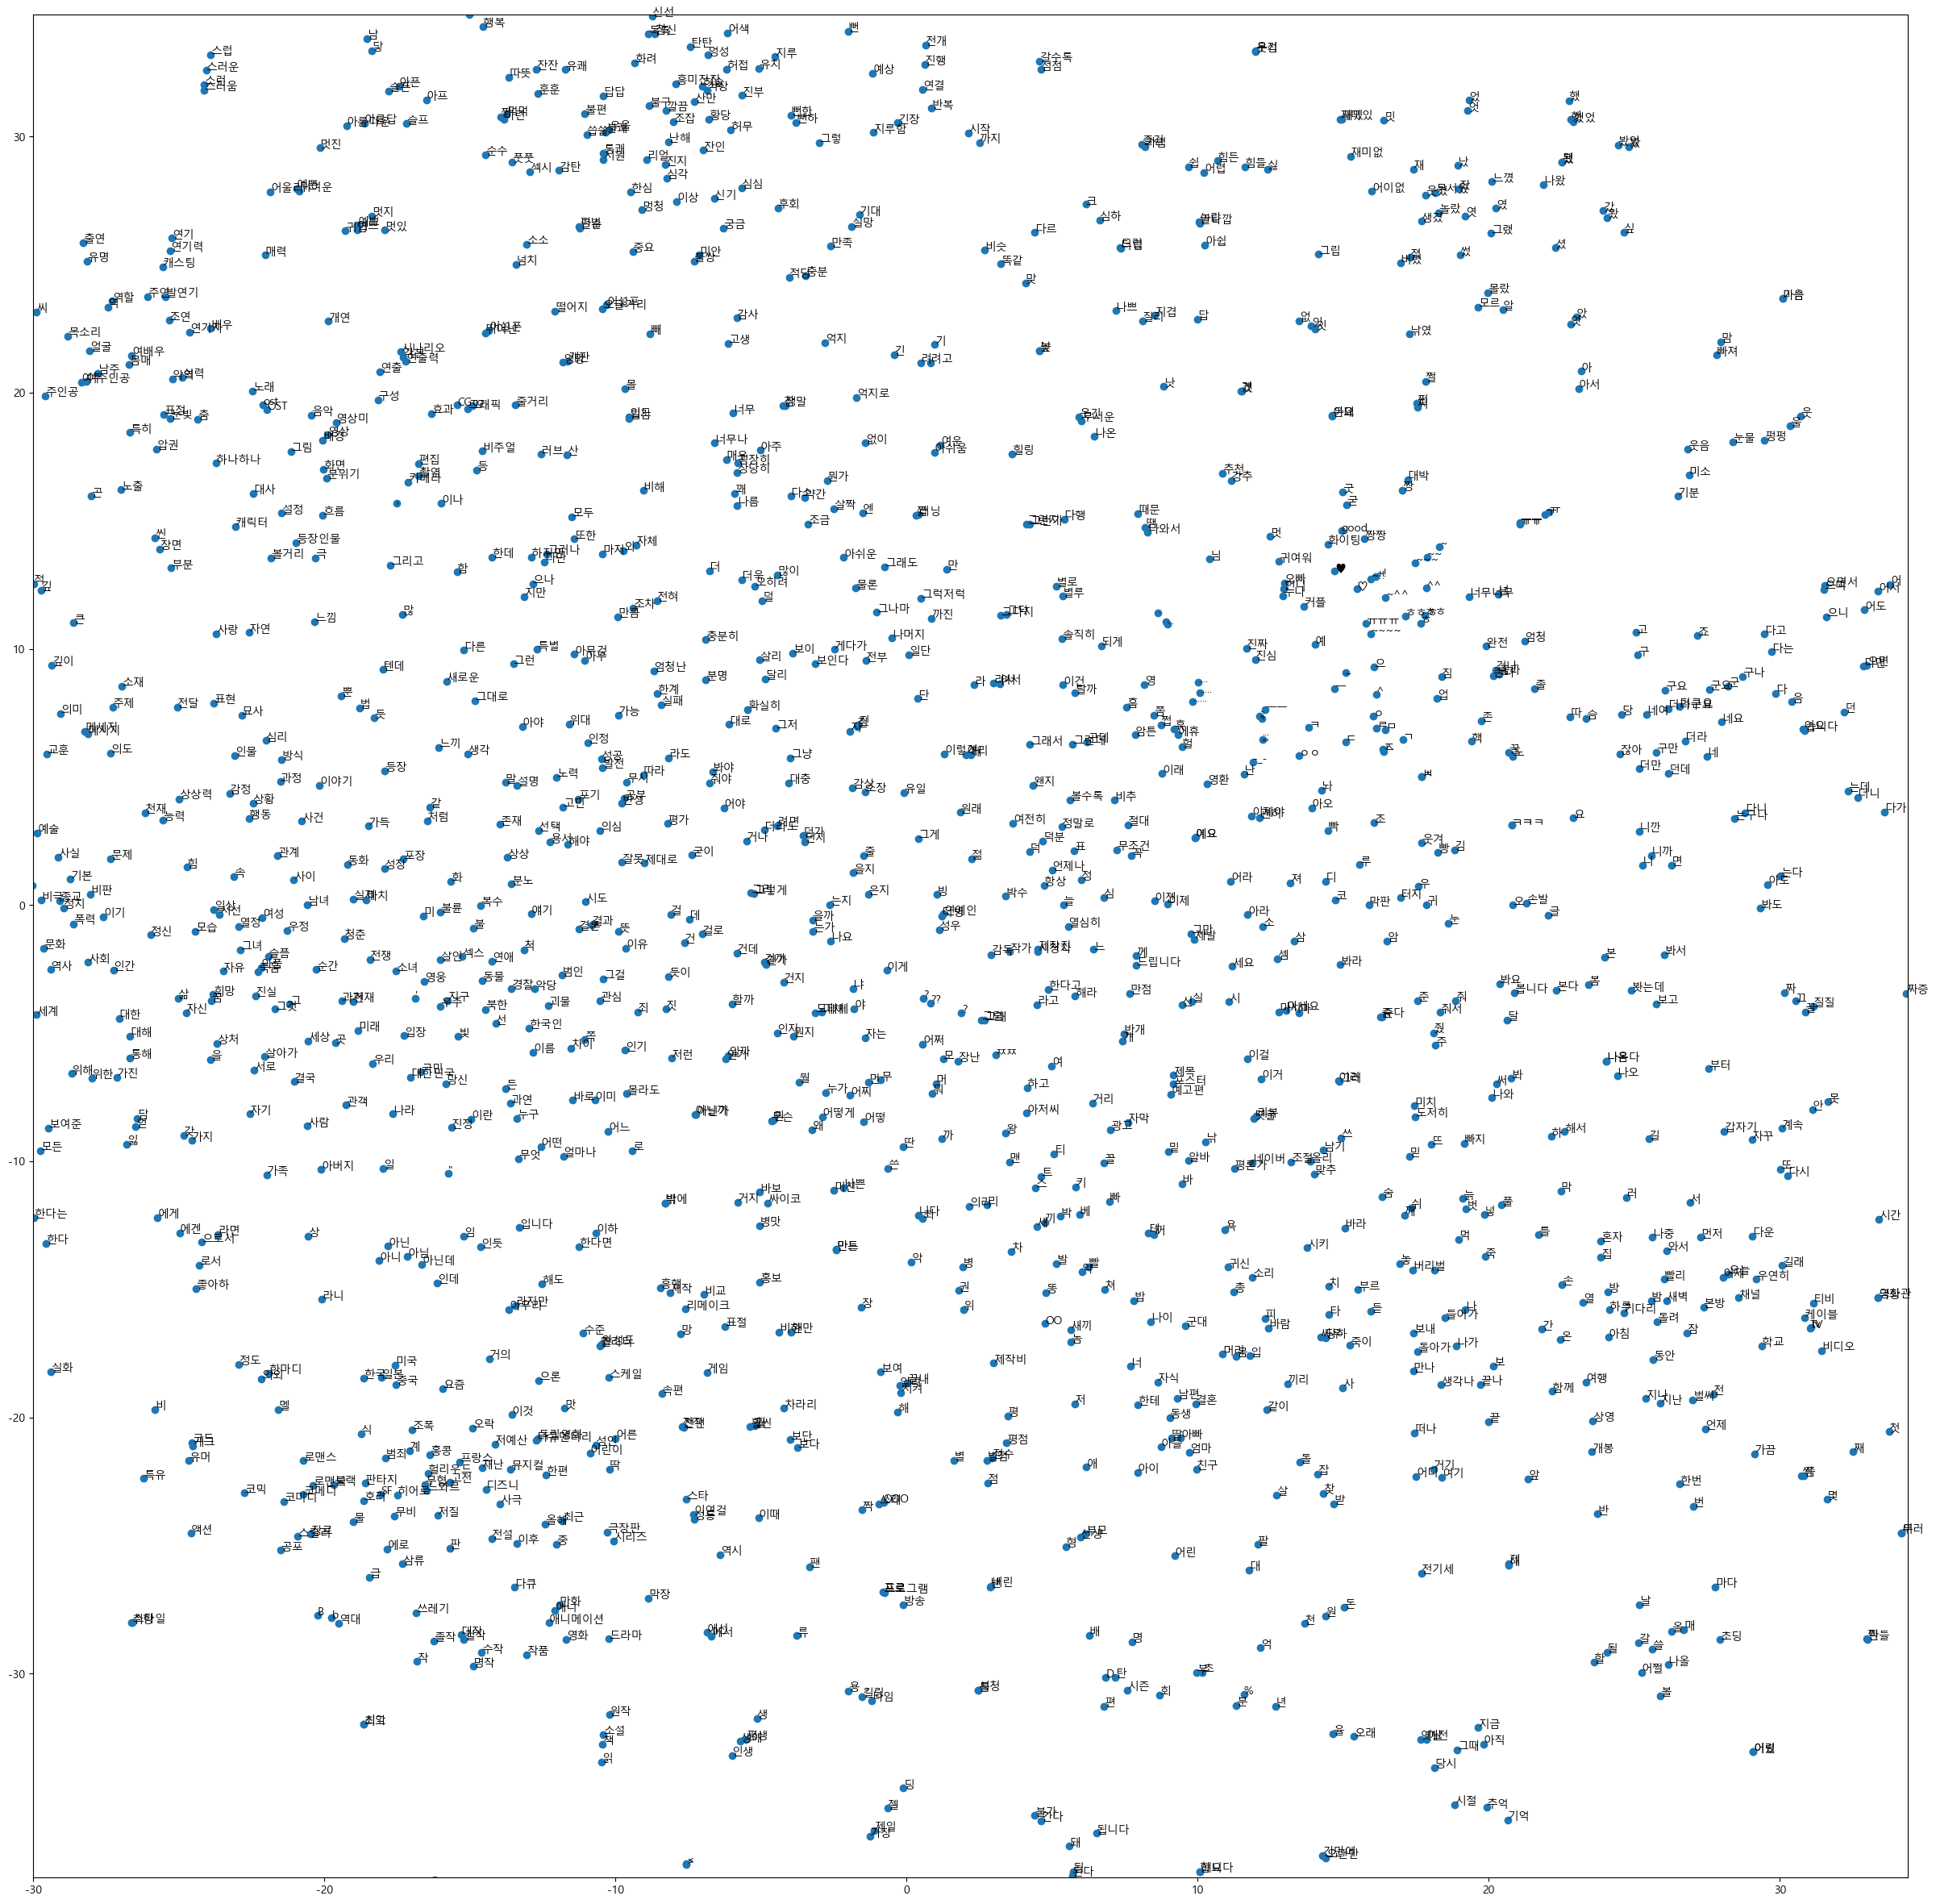

In [32]:
from sklearn.manifold import TSNE
%matplotlib inline
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


tsne = TSNE(n_components=2, random_state=0)
# 1500개의 단어만 선별. 시각화
n_tokens = 1500
X_tsne = tsne.fit_transform(model.wv.vectors[:n_tokens])

plt.figure(figsize=[30, 30])
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],)
for i, text in enumerate(model.wv.index_to_key[:n_tokens]):
    plt.annotate(text, X_tsne[i])

plt.xlim(min(X_tsne[:, 0])*0.8, max(X_tsne[:, 0])*0.8)
plt.ylim(min(X_tsne[:, 1])*0.8, max(X_tsne[:, 1])*0.8)
plt.show()